In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
df =pd.read_csv("autos.csv",header=0,sep=',',encoding='Latin1',)


FileNotFoundError: ignored

In [ ]:
df.seller.value_counts()

privat    39901
Name: seller, dtype: int64

In [ ]:
df[df.seller != 'gewerblich']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39896,2016-03-24 00:57:00,Volkswagen_Golf_1.2_TSI_BlueMotion_Technology_Cup,privat,Angebot,15500,test,limousine,2015,manuell,86,golf,10000,1,benzin,volkswagen,nein,2016-03-23 00:00:00,0.0,34270.0,2016-04-06 20:47:44
39897,2016-03-31 18:55:48,Chrysler_PT_Cruiser_2.0_Touring,privat,Angebot,1800,control,kombi,2003,automatik,136,ptcruiser,150000,6,benzin,chrysler,nein,2016-03-31 00:00:00,0.0,94356.0,2016-03-31 18:55:48
39898,2016-03-08 09:57:12,Audi_A3,privat,Angebot,15000,control,limousine,2011,manuell,250,a3,100000,3,benzin,audi,nein,2016-03-08 00:00:00,0.0,39638.0,2016-04-06 20:19:29
39899,2016-03-28 17:54:18,A8_3.0_TDI_DPF_quattro_FULL_LEDER_FULL_OPTION,privat,Angebot,6500,test,limousine,2009,automatik,232,a8,150000,10,diesel,audi,nein,2016-03-28 00:00:00,0.0,22303.0,2016-03-28 17:54:18


In [ ]:
df=df.drop('seller',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df.offerType.value_counts()

Angebot    39900
Gesuch         1
Name: offerType, dtype: int64

In [ ]:
df[df.offerType !='Gesuch']

In [ ]:
df=df.drop('offerType',1)

In [ ]:
df.shape

In [ ]:
df.powerPS.value_counts()

0       4566
75      2597
60      1676
150     1664
140     1425
        ... 
2729       1
1111       1
440        1
485        1
9          1
Name: powerPS, Length: 420, dtype: int64

In [ ]:
df=df[(df.powerPS > 50)&(df.powerPS <900)]
df.shape

(34113, 18)

In [ ]:
df.yearOfRegistration.value_counts()

2006    2044
2005    2021
1999    2015
2000    2007
2003    1933
        ... 
1910       1
1949       1
1953       1
2019       1
1957       1
Name: yearOfRegistration, Length: 71, dtype: int64

In [ ]:
df=df[(df.yearOfRegistration >=1950)&(df.yearOfRegistration <2017)]
df.shape

In [ ]:
df.drop(['name','abtest','dateCrawled','nrOfPictures','lastSeen','postalCode','dateCreated'],axis='columns',inplace=True)

In [ ]:
new_df =df.copy()
new_df =new_df.drop_duplicates(['price','vehicleType','yearOfRegistration','gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType','notRepairedDamage'])

In [ ]:
new_df.gearbox.replace(('manuell','automatik'),('manual','automatic'),inplace=True)
new_df.fuelType.replace(('benzin','andere','elektro'),('petrol','others','electric'),inplace=True)
new_df.vehicleType.replace(('kleinwagen','cabria','kombi','andere'),('small car','convertible','combination','others'),inplace=True)
new_df.notRepairedDamage.replace(('ja','nein'),('Yes','No'),inplace=True)

In [ ]:
df.price.value_counts()

0        674
500      451
1500     448
1000     384
2500     367
        ... 
1929       1
5870       1
6385       1
60         1
48500      1
Name: price, Length: 2045, dtype: int64

In [ ]:
df.shape

(32991, 11)

In [ ]:
df.vehicleType.value_counts()

limousine     9480
kleinwagen    6798
kombi         6655
bus           2996
cabrio        2247
coupe         1844
suv           1456
andere         274
Name: vehicleType, dtype: int64

In [ ]:
new_df =new_df[(new_df.price >=100)&(new_df.price <=150000)]

In [ ]:
df.fuelType.value_counts()

benzin     20238
diesel     10432
lpg          485
cng           61
hybrid        25
andere        10
elektro        6
Name: fuelType, dtype: int64

In [ ]:
df.gearbox.value_counts()

manuell      25139
automatik     7305
Name: gearbox, dtype: int64

In [ ]:
df.isnull()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
39896,False,False,False,False,False,False,False,False,False,False,False
39897,False,False,False,False,False,False,False,False,False,False,False
39898,False,False,False,False,False,False,False,False,False,False,False
39899,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['fuelType'].isnull().any()

True

In [ ]:
df['gearbox'].isnull().any()

True

In [ ]:
df['model'].isnull().any()

True

In [ ]:
df['notRepairedDamage'].isnull().any()

True

In [ ]:
df['vehicleType'].isnull().any()

True

In [ ]:
df['kilometer'].isnull().any()

False

In [ ]:
df['yearOfRegistration'].isnull().any()

False

In [ ]:
df['monthOfRegistration'].isnull().any()

False

In [ ]:
df['powerPS'].isnull().any()

False

In [ ]:
df['price'].isnull().any()

False

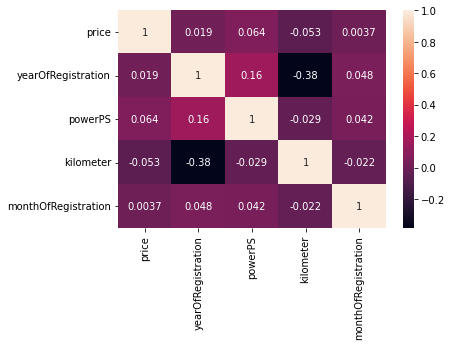

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

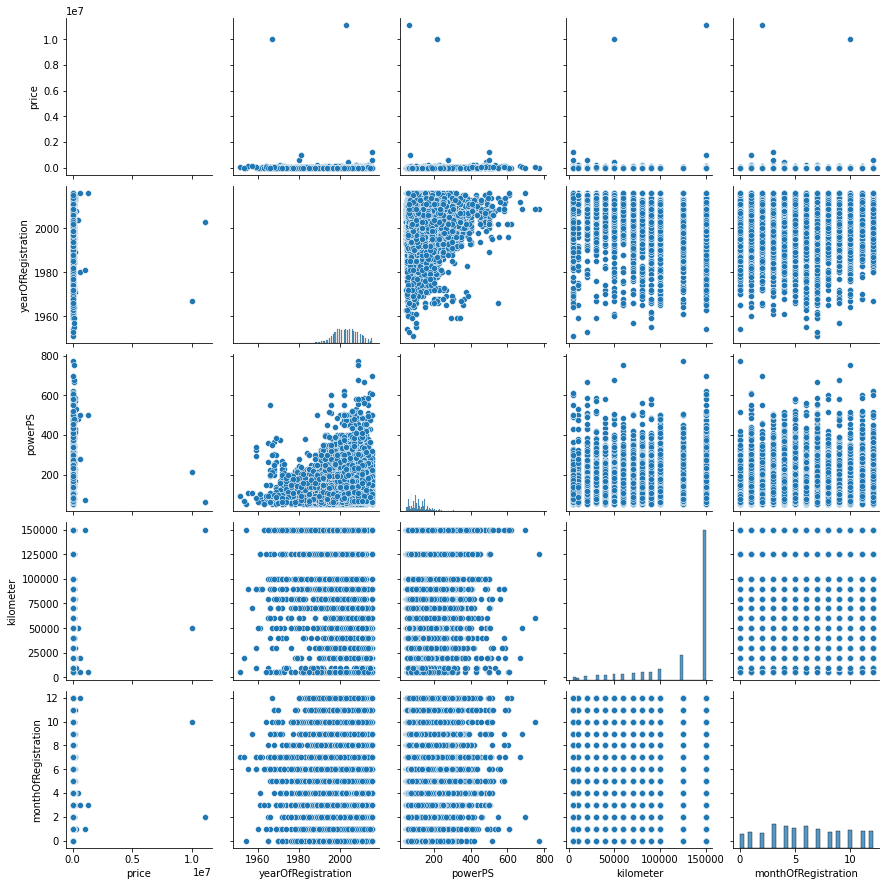

In [ ]:

sns.pairplot(df)

In [ ]:
new_df['notRepairedDamage'].fillna(value='not-declared',inplace=True)
new_df['fuelType'].fillna(value='not-declared',inplace=True)
new_df['gearbox'].fillna(value='not-declared',inplace=True)
new_df['vehicleType'].fillna(value='not-declared',inplace=True)
new_df['model'].fillna(value='not-declared',inplace=True)


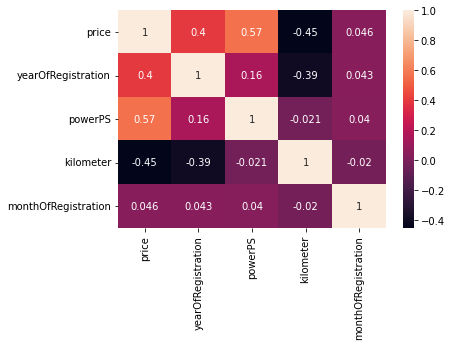

In [ ]:
sns.heatmap(new_df.corr(),annot=True)

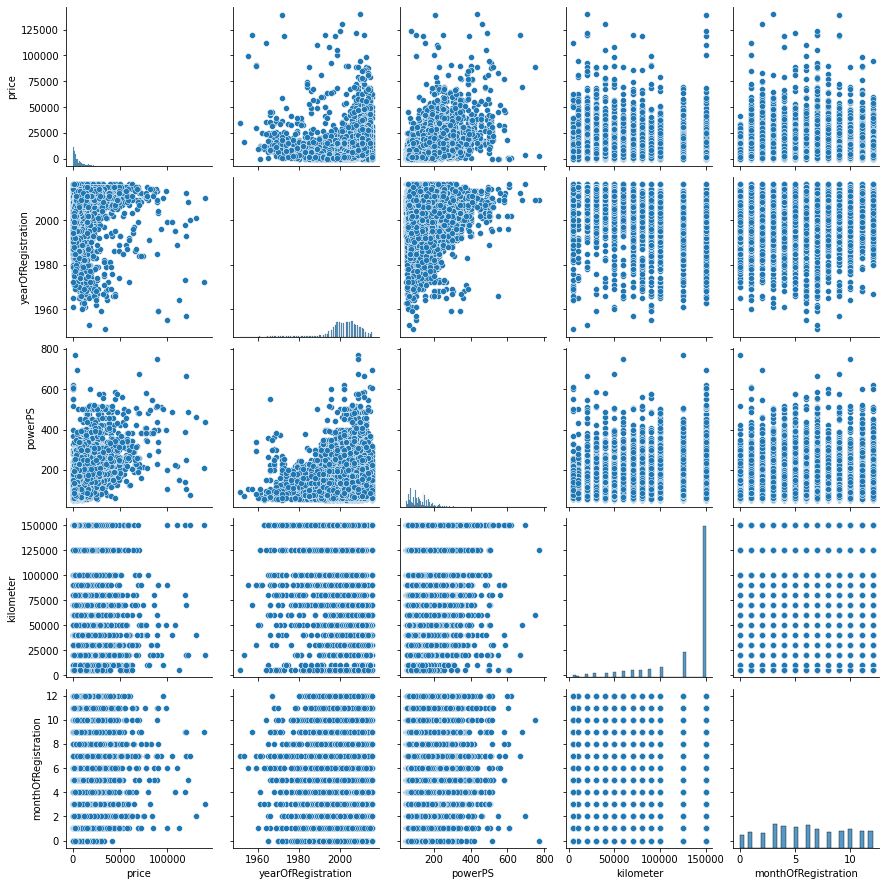

In [ ]:
sns.pairplot(new_df)

In [ ]:
new_df.to_csv("autos_prep.csv")

In [ ]:
x=new_df['price']
x

1        18300
2         9800
3         1500
4         3600
5          650
         ...  
39895     1550
39896    15500
39897     1800
39898    15000
39900     1650
Name: price, Length: 31784, dtype: int64

In [ ]:
y=new_df